In [23]:
#%pip install pynput

In [24]:
#%pip install pyautogui

In [25]:
#!pip install pydirectinput

In [26]:
import cv2
import numpy as np
import random
import pydirectinput
import time

# Load reference images
image_paths = [
    "Screenshot 2024-12-16 154156.png" ,
    "Screenshot 2024-12-16 185345.png" ,
   
]
# ref 1 (X) : Screenshot 2024-12-16 154156.png , purple
# ref 2 (Y) : Screenshot 2024-12-16 185345.png , blue 
# ref 3 (Z) : Screenshot 2024-12-16 185500.png , yellow
# ref 4 (V) : Screenshot 2024-12-16 185542.png , red
def process_and_locate(image_paths, screenshot, scales=(0.4,0.45, 0.5,0.55,0.6,0.65 , 0.7 , 0.75 , 0.8 , 0.85 , 0.9 ,0.95 , 1.0)):
    """
    Process the screenshot and locate the position of the game window based on reference images.
    Save the minimum threshold smaller than 0.3 and return its game location.
    """
    
    
    reference_images_data = []
    
    for i, path in enumerate(image_paths, start=1):
        ref_image = cv2.imread(path)
        if ref_image is not None:
            label = f"Game Screen {i}"
            reference_images_data.append({"image": ref_image, "label": label})
        else:
            print(f"Error: Could not load {path}")
    
    gray_screenshot = cv2.cvtColor(screenshot, cv2.COLOR_BGR2GRAY)
    threshold = 0.31
    min_threshold = float('inf')  # Variable to store the smallest threshold
    best_game_location = None  # Variable to store the best game location
    
    for ref in reference_images_data:
        for scale in scales:
            scaled_ref = cv2.resize(ref["image"], None, fx=scale, fy=scale, interpolation=cv2.INTER_AREA)
            result = cv2.matchTemplate(screenshot, scaled_ref, cv2.TM_SQDIFF_NORMED)
            min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(result)
            print(f"[DEBUG] Match results for {ref['label']}: Min Val={min_val} , Max Val={max_val}, Min Loc={min_loc}")
            
            if min_val < min_threshold and min_val < threshold:  # Check if this is the new minimum
                min_threshold = min_val
                best_game_location = (min_loc[0], min_loc[1], scaled_ref.shape[1], scaled_ref.shape[0])
    
    # If a valid game location was found, return it
    if best_game_location:
        print(f"[DEBUG] Minimum threshold: {min_threshold}")
        return best_game_location
    
    return None


def move_character(direction):
    """
    Simulate key presses to move the character left or right.
    """
    if direction == "left":
        pydirectinput.press('left')  # Simulates pressing the Left Arrow key
        print("Moving Left")
        
    elif direction == "right":
        pydirectinput.press('right')  # Simulates pressing the Right Arrow key
        print("Moving Right")

def auto_play(image_path):
    # Load the provided image
    screenshot = cv2.imread(image_path)
    if screenshot is None:
        print(f"Error: Could not load image at path {image_path}")
        return
    
    last_press_time = time.time()  # Track the time of the last press
    
    
        # Locate the game window
    
    game_location = process_and_locate(image_paths, screenshot)
    
    # If game location is found, extract and display the region
    if game_location:
        x, y, w, h = game_location
        
        # Draw a green rectangle around the matched template
        cv2.rectangle(screenshot, (x, y), (x + w, y + h), (0, 255, 0), 2)
        print(f"Drawing rectangle at: x={x}, y={y}, w={w}, h={h}")
        
        # Display the updated screenshot with the rectangle
        screenshot = cv2.resize(screenshot , (900 , 700))
        cv2.imshow("Game Screen", screenshot)
        cv2.waitKey(0)
        cv2.destroyAllWindows()
        # Check if it's time to press a key
        current_time = time.time()
        # if current_time - last_press_time >= 0.5:  # 0.5-second delay
        #     direction = random.choice(["left", "right"])
        #     move_character(direction)
        #     last_press_time = current_time  # Reset the timer
    else:
        print("Game window not found!")
    
    
    # Exit the loop if 'q' is pressed
    
        


# Main function to run the auto-play feature
if __name__ == "__main__":
    # Replace this with the path of the image you want to use
    image_path = "C:\\Users\\mayar\\Pictures\\Screenshots\\test_size7.png"
    #Screenshot 2024-12-25 175835.png V
    #Screenshot 2024-12-25 175914.png V 
    #Screenshot 2024-12-25 175856.png X Y Z V size
    #Screenshot 2024-12-25 175931.png X Y Z V
    #Screenshot 2024-12-25 175944.png X Y Z V
    
    # sized photos
    #size1 min val = 4
    #size2 min val = 4.8
    #size3 min val = 1.9
    #size4 min val = 3.2
    #size5 min val = 1.8 
    # tested sized photos
    #test_size1
    #test_size2
    #test_size3
    #test_size7 habaed

    
    """_summary_ there is a problem in red color refrence and there is a problem in size the first and second screen its give me a match but a low match 
    so the color is problem 
    """
    auto_play(image_path)


Error: Could not load image at path C:\Users\mayar\Pictures\Screenshots\test_size7.png


In [ ]:
import cv2

# Load the image in color mode
path = 'C:\\Users\\mayar\\Pictures\\Screenshots\\Screenshot 2024-12-25 175957.png'
image = cv2.imread(path)

# Convert the image to grayscale to determine threshold
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply binary threshold
_, binary_image = cv2.threshold(gray_image, 128, 255, cv2.THRESH_BINARY)

# Apply the binary image as a mask on the original image
masked_image = cv2.bitwise_and(image, image, mask=binary_image)

# Convert the masked image to grayscale
final_gray_image = cv2.cvtColor(masked_image, cv2.COLOR_BGR2GRAY)

# Display the result (for testing purposes)
final_gray_image = cv2.resize(final_gray_image , (1100 , 700))
cv2.imshow("Binary Threshold + Grayscale", final_gray_image)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
img = cv2.imread('C:\\Users\\mayar\\Pictures\\Screenshots\\color12.png')  # Replace with your image path
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

# Extract the Hue channel
hue_channel = hsv[:, :, 0]

# Calculate the histogram of the Hue channel
hist = cv2.calcHist([hue_channel], [0], None, [180], [0, 180])

# Find the most frequent Hue value
most_frequent_hue = np.argmax(hist)

# Define a range around the most frequent hue (e.g., for crimson, adjust if needed)
hue_range =160  # Range around the most frequent hue
lower_bound = np.array([most_frequent_hue - hue_range, 50, 50])  # Adjust saturation and value as needed
upper_bound = np.array([most_frequent_hue + hue_range, 255, 255])

# Create a mask for the target color
mask = cv2.inRange(hsv, lower_bound, upper_bound)

# Replace the target color with white
result = img.copy()
result[mask > 0] = [255, 255, 255]  # Set to white in BGR

# Display the results
cv2.imshow("Original Image", img)
cv2.imshow("Masked Image", mask)
cv2.imshow("Result Image", result)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [ ]:
import cv2
import matplotlib.pyplot as plt

# Load the image
img = cv2.imread('C:\\Users\\mayar\\Pictures\\Screenshots\\color12.png')  # Replace with your image path
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB for matplotlib

# Calculate histograms for each channel
colors = ('r', 'g', 'b')  # Color names
for i, color in enumerate(colors):
    hist = cv2.calcHist([img], [i], None, [256], [0, 256])
    plt.plot(hist, color=color)
    plt.xlim([0, 256])

plt.title('Color Histogram')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.show()


In [ ]:
import cv2
import numpy as np

# Load the image
img = cv2.imread('C:\\Users\\mayar\\Pictures\\Screenshots\\color12.png')  # Replace 'image.jpg' with your image path

# Convert to HSV
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

# Extract the H, S, and V channels
h, s, v = cv2.split(hsv)

# Reduce the Value (V) channel
reduction_amount = 35  # Adjust this value to control brightness reduction
v = np.clip(v - reduction_amount, 0, 255)  # Ensure values remain in [0, 255]

# Merge the channels back
hsv_reduced = cv2.merge([h, s, v])

# Convert back to BGR
img_reduced_brightness = cv2.cvtColor(hsv_reduced, cv2.COLOR_HSV2BGR)

# Display the result
cv2.imshow('Original Image', img)
cv2.imshow('Reduced Brightness', img_reduced_brightness)
cv2.waitKey(0)
cv2.destroyAllWindows()


# *the code* 

In [52]:
import cv2
import numpy as np
import random
import pydirectinput
import mss
import time
from pynput import keyboard
import matplotlib.pyplot as plt



In [53]:
def process_and_locate(image_paths, screenshot, scales=(0.4,0.45, 0.5,0.55,0.6,0.65 , 0.7 , 0.75 , 0.8 , 0.85 , 0.9 ,0.95 , 1.0 , 1.2 , 1.4 , 1.5)):
    """
    Process the screenshot and locate the position of the game window based on reference images.
    Save the minimum threshold smaller than 0.3 and return its game location.
    """
    
    
    reference_images_data = []
    
    for i, path in enumerate(image_paths, start=1):
        ref_image = cv2.imread(path)
        if ref_image is not None:
            label = f"Game Screen {i}"
            reference_images_data.append({"image": ref_image, "label": label})
        else:
            print(f"Error: Could not load {path}")
    
    gray_screenshot = cv2.cvtColor(screenshot, cv2.COLOR_BGR2GRAY)
    threshold = 0.31
    min_threshold = float('inf')  # Variable to store the smallest threshold
    best_game_location = None  # Variable to store the best game location
    
    for ref in reference_images_data:
        for scale in scales:
            scaled_ref = cv2.resize(ref["image"], None, fx=scale, fy=scale, interpolation=cv2.INTER_AREA)
            result = cv2.matchTemplate(screenshot, scaled_ref, cv2.TM_SQDIFF_NORMED)
            min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(result)
            print(f"[DEBUG] Match results for {ref['label']}: Min Val={min_val} , Max Val={max_val}, Min Loc={min_loc}")
            
            if min_val < min_threshold and min_val < threshold:  # Check if this is the new minimum
                min_threshold = min_val
                best_game_location = (min_loc[0], min_loc[1], scaled_ref.shape[1], scaled_ref.shape[0])
    
    # If a valid game location was found, return it
    if best_game_location:
        print(f"[DEBUG] Minimum threshold: {min_threshold}")
        return best_game_location
    
    return None

In [54]:
def move_character(direction, num_press = 1):
    """
    Simulate key presses to move the character left or right.
    """
    if direction == "left":
        pydirectinput.press('left',_pause = False,presses=num_press)  # Simulates pressing the Left Arrow key
        print("Moving Left")
        
    elif direction == "right":
        pydirectinput.press('right',_pause = False,presses=num_press)  # Simulates pressing the Right Arrow key
        print("Moving Right")

In [214]:
LEFT_ROI = None
RIGHT_ROI = None
CENTER_ROI = None
global located

def locate_player_and_define_rois(frame_left, character_template):
    """
    Locate the player in the given frame using template matching and define three ROIs:
    - Left ROI: Based on the character's location.
    - Right ROI: Shifted to the right by 2.5 * template_width from the Left ROI.
    - Center ROI: Shifted further to the right by 2.5 * template_width.

    Parameters:
        frame_left (np.ndarray): The input frame where the character is on the left.
        character_template (np.ndarray): The template image of the character.

    Returns:
        None: Updates the global variables LEFT_ROI, RIGHT_ROI, CENTER_ROI.
    """
    global LEFT_ROI, RIGHT_ROI, CENTER_ROI

    def get_roi(frame, template_gray):
        # Convert frame to grayscale
        frame_gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

        # Get dimensions of the template
        template_height, template_width = template_gray.shape
        extra_height = 1.2 * template_height
        adjusted_height = int(template_height + extra_height)
        extra_width = 1.5 * template_width
        adjusted_width = int(template_width + extra_width)

        # Perform template matching
        result = cv2.matchTemplate(frame_gray, template_gray, cv2.TM_CCOEFF_NORMED)
        _, _, _, top_left = cv2.minMaxLoc(result)

        # Define the ROI
        x = top_left[0]
        y = max(0, top_left[1] - int(extra_height))
        w = template_width
        h = adjusted_height
        return (x, y, w, h), template_width, template_height

    # Convert template to grayscale
    template_gray = cv2.cvtColor(character_template, cv2.COLOR_BGR2GRAY)

    # Get the Left ROI
    LEFT_ROI, template_width, template_height = get_roi(frame_left, template_gray)
   # print(f"Left ROI Coordinates: x={LEFT_ROI[0]}, y={LEFT_ROI[1]}, w={LEFT_ROI[2]}, h={LEFT_ROI[3]}")

    additional_width = int(template_width / 3)  # Additional width to extend
    left_x = max(0, LEFT_ROI[0] - (additional_width // 2))  # Shift left by half the additional width
    left_w = LEFT_ROI[2] + additional_width  # Increase the width symmetrically
    LEFT_ROI = (left_x, LEFT_ROI[1], left_w, LEFT_ROI[3])

    # Get the Right ROI by shifting from the Left ROI
    right_x = LEFT_ROI[0] + int(2.8* template_width)
    right_y = LEFT_ROI[1]
    right_w = LEFT_ROI[2] 
    right_h = LEFT_ROI[3]
    RIGHT_ROI = (right_x, right_y, right_w, right_h)
  #  print(f"Right ROI Coordinates: x={RIGHT_ROI[0]}, y={RIGHT_ROI[1]}, w={RIGHT_ROI[2]}, h={RIGHT_ROI[3]}")

    # Get the Center ROI based on Left ROI dimensions
    center_x = LEFT_ROI[0] + LEFT_ROI[2]  # Start right after the Left ROI
    center_y = LEFT_ROI[1] + LEFT_ROI[3] - int(template_height*1.3)# Start from the bottom of Left ROI
    center_w = LEFT_ROI[2] + int(template_width/8)  # Width equal to the width of the Left ROI
    center_h = template_height
    CENTER_ROI = (center_x, center_y, center_w, center_h)
   # print(f"Center ROI Coordinates: x={CENTER_ROI[0]}, y={CENTER_ROI[1]}, w={CENTER_ROI[2]}, h={CENTER_ROI[3]}")


In [56]:
import cv2
import numpy as np

def detect_branches(mask):
    """
    Detect branches using the given mask and return their locations.
    
    Parameters:
        mask (np.ndarray): Binary mask highlighting the tree trunk and branches.

    Returns:
        bool: True if branches are found, False otherwise.
        list: A list of branch lines, each represented as (x1, y1, x2, y2).
    """
    # Apply Gaussian Blur to reduce noise
    blurred_mask = cv2.GaussianBlur(mask, (5, 5), 0)
    
    # Edge detection using Canny
    edges = cv2.Canny(blurred_mask, 100, 150)
    
    # Detect horizontal lines using Hough Line Transform
    lines = cv2.HoughLinesP(edges, 1, np.pi / 180, threshold=30, minLineLength=30, maxLineGap=10)
    
    branches = []
    if lines is not None:
        for line in lines:
            x1, y1, x2, y2 = line[0]
            if abs(y2 - y1) < 10:  # Only keep horizontal lines
                branches.append((x1, y1, x2, y2))
    
    # Print the detected branches
    if branches:
        print(f"Branches Detected: {branches}")
        return True
    else:
        print("No branches detected.")
        return False

def detect_branches_in_roi_hough(frame, roi_coords):
    """
    Detect branches in the ROI of the frame using Hough Lines.

    Parameters:
        frame (np.ndarray): The input frame where branches will be detected.
        roi_coords (tuple): Coordinates of the ROI as (x, y, w, h).

    Returns:
        bool: True if branches are found, False otherwise.
    """
    # Extract ROI from the frame
    x, y, w, h = roi_coords
    roi = frame[y:y + h, x:x + w]

    # Convert ROI to grayscale
    roi_gray = cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY)

    # Apply binary thresholding
    _, roi_thresh = cv2.threshold(roi_gray, 65, 255, cv2.THRESH_BINARY_INV)

    # Refine the mask using morphological operations
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (13, 13))
    roi_refined = cv2.morphologyEx(roi_thresh, cv2.MORPH_CLOSE, kernel)

    # Detect branches using the Hough Line-based function
    return detect_branches(roi_refined)

In [57]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def detect_branches_new(mask):
    blurred_mask = cv2.GaussianBlur(mask, (5, 5), 0)
    edges = cv2.Canny(blurred_mask, 100, 150)
    lines = cv2.HoughLinesP(edges, 1, np.pi / 180, threshold=30, minLineLength=30, maxLineGap=10)
    branches = []
    if lines is not None:
        for line in lines:
            x1, y1, x2, y2 = line[0]
            if abs(y2 - y1) < 10:  # Only keep horizontal lines
              branches.append((x1, y1, x2, y2))
    return branches

def detect_branches_in_roi_hough_new(frame, roi_coords):
    x, y, w, h = roi_coords
    roi = frame[y:y + h, x:x + w]
    roi_gray = cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY)
    _, roi_thresh = cv2.threshold(roi_gray, 65, 255, cv2.THRESH_BINARY_INV)
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (13, 13))
    roi_refined = cv2.morphologyEx(roi_thresh, cv2.MORPH_CLOSE, kernel)
    branches = detect_branches_new(roi_refined)

    # Draw detected branches on the ROI
    roi_with_branches = roi.copy()
    for x1, y1, x2, y2 in branches:
        cv2.line(roi_with_branches, (x1, y1), (x2, y2), (0, 255, 0), 2)

    # Visualization using Matplotlib
    fig, ax = plt.subplots(1, 3, figsize=(15, 5))
    ax[0].imshow(cv2.cvtColor(roi, cv2.COLOR_BGR2RGB))
    ax[0].set_title("Original ROI")
    ax[0].axis("off")

    ax[1].imshow(roi_thresh, cmap="gray")
    ax[1].set_title("Binary Threshold (Inverted)")
    ax[1].axis("off")

    ax[2].imshow(cv2.cvtColor(roi_with_branches, cv2.COLOR_BGR2RGB))
    ax[2].set_title("Detected Branches")
    ax[2].axis("off")

    plt.tight_layout()
    plt.show()
    
    if branches:
        print(f"Branches Detected: {branches}")
        return True
    else:
        print("No branches detected.")
        return False

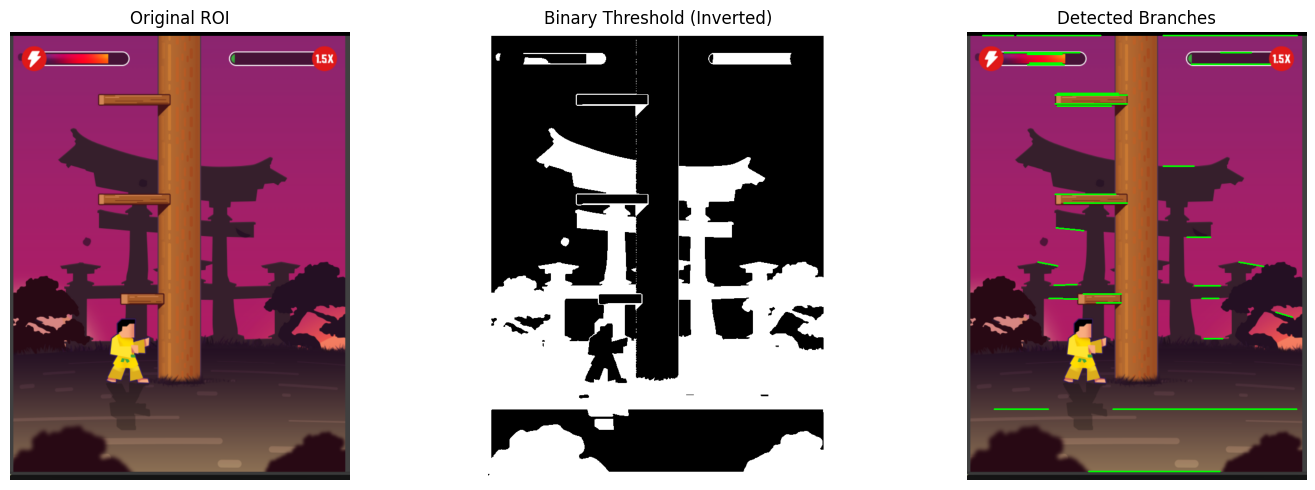

Branches Detected: [(264, 684, 597, 684), (355, 6, 598, 6), (67, 37, 204, 37), (406, 58, 549, 58), (220, 797, 458, 797), (159, 114, 290, 114), (175, 310, 290, 310), (159, 294, 269, 294), (163, 111, 274, 111), (159, 130, 290, 130), (90, 6, 146, 6), (109, 59, 176, 59), (459, 37, 515, 37), (425, 483, 456, 483), (113, 56, 172, 56), (163, 134, 261, 134), (109, 40, 172, 40), (147, 6, 198, 6), (148, 483, 200, 484), (91, 684, 147, 684), (49, 684, 90, 684), (210, 475, 279, 475), (199, 6, 242, 6), (355, 243, 411, 243), (28, 6, 84, 6), (429, 556, 463, 556), (234, 491, 279, 491), (157, 459, 199, 458), (161, 355, 211, 360), (398, 372, 441, 372), (412, 460, 459, 460), (559, 508, 589, 517), (128, 417, 164, 424), (492, 417, 537, 425)]


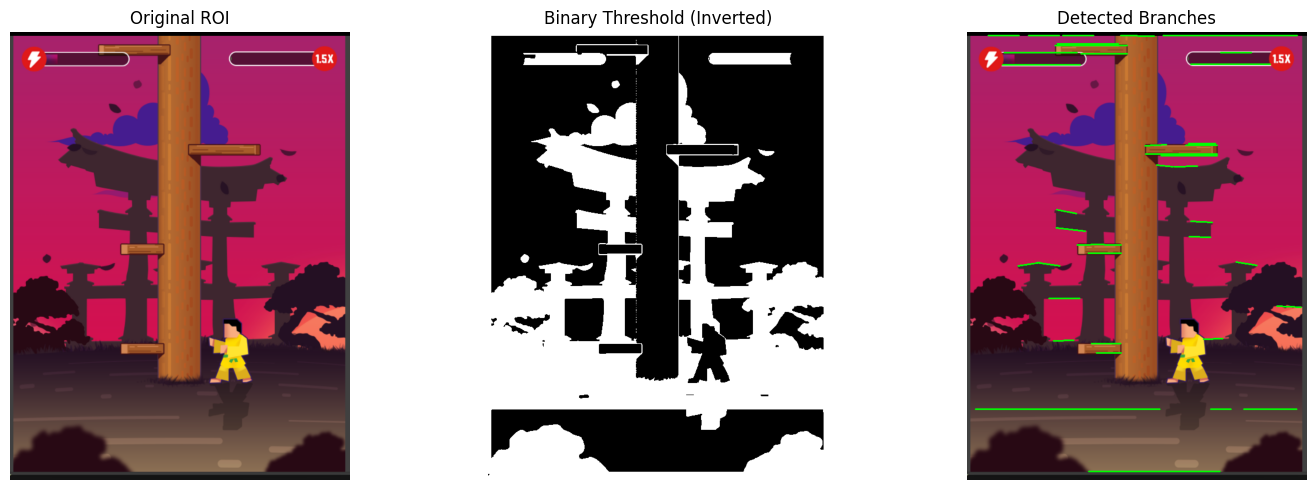

Branches Detected: [(355, 6, 598, 6), (15, 684, 349, 684), (220, 797, 458, 797), (67, 37, 199, 37), (405, 58, 549, 58), (64, 59, 205, 59), (323, 221, 453, 221), (159, 24, 290, 24), (351, 224, 453, 224), (206, 39, 290, 39), (148, 483, 204, 483), (163, 21, 274, 21), (396, 205, 453, 205), (501, 684, 557, 684), (322, 206, 361, 204), (234, 582, 279, 582), (441, 684, 478, 684), (401, 202, 450, 202), (459, 37, 515, 37), (111, 6, 167, 6), (38, 6, 94, 6), (225, 565, 278, 565), (219, 401, 279, 401), (156, 560, 193, 559), (428, 557, 463, 556), (173, 6, 229, 6), (161, 355, 214, 361), (375, 244, 417, 243), (249, 386, 279, 386), (278, 6, 339, 7), (402, 371, 441, 372), (126, 418, 168, 424), (343, 241, 373, 244), (405, 343, 444, 345), (199, 386, 248, 385), (561, 497, 605, 499), (487, 417, 525, 423), (558, 684, 597, 684), (92, 424, 132, 418), (162, 322, 198, 329)]


True

In [58]:
frame = cv2.imread('C://Users//shaym//Downloads//game_screen_18.png')  
character_template_2 = cv2.imread('character_template_2.png') 
new_frame = cv2.imread("saved_regions\game_region_20250104-152152.png")
new_frame_2 = cv2.imread("saved_regions\game_region_20250104-152136.png")

height, width, _ = new_frame.shape 
frame_coords = (0, 0, width, height) 

height_2, width_2 , _ = new_frame_2.shape
frame_coords_2 = (0,0,width_2,height_2)
"""locate_player_and_define_rois(frame, character_template_2)
detect_branches_in_roi_hough_new(frame, LEFT_ROI)
detect_branches_in_roi_hough_new(frame, RIGHT_ROI)"""

detect_branches_in_roi_hough_new(new_frame,frame_coords)
detect_branches_in_roi_hough_new(new_frame_2, frame_coords_2)

In [59]:
import cv2
import numpy as np

def make_pixels_black_by_v(img):
    """
    Modifies the image so that pixels with V (value) > 180 in HSV are set to black.

    Parameters:
    img (numpy.ndarray): Input image in BGR format.

    Returns:
    numpy.ndarray: Modified image in BGR format.
    """
    # Convert the image from BGR to HSV
    hsv_image = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

    # Split the HSV channels
    h, s, v = cv2.split(hsv_image)

    # Create a mask for V > 180
    mask = v > 220
    # Set H, S, and V to 0 for pixels where V > 180
    h[mask] = 150
    s[mask] = 150
    v[mask] = 255

    # Merge the channels back into an HSV image
    hsv_modified = cv2.merge([h, s, v])

    # Convert back to BGR color space
    bgr_modified = cv2.cvtColor(hsv_modified, cv2.COLOR_HSV2BGR)
    #bgr_modified = cv2.cvtColor(hsv_modified, cv2.COLOR_BGR2GRAY)

    return bgr_modified

In [60]:
def apply_binary_mask (img):
    # Convert to HSV
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    hue_channel = hsv[:, :, 0]  # Extract the Hue channel

    # Normalize the Hue values to the full range [0, 255]
    hue_normalized = cv2.normalize(hue_channel, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX)
    #cv2.imshow('hue_normalize' , hue_normalized)
    #cv2.waitKey(0)
    # # Remove yellow regions
    # lower_yellow = np.array([20, 100, 100])
    # upper_yellow = np.array([30, 255, 255])
    # yellow_mask = cv2.inRange(hsv, lower_yellow, upper_yellow)

    # Threshold the black areas in the Hue channel
    _, black_mask = cv2.threshold(hue_normalized, 19, 255, cv2.THRESH_BINARY_INV)

    # Refine the mask with morphological operations
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (13, 13))
    black_mask_refined = cv2.morphologyEx(black_mask, cv2.MORPH_OPEN, kernel)  # Remove small noise
    black_mask_refined = cv2.morphologyEx(black_mask_refined, cv2.MORPH_CLOSE, kernel)  # Fill small gaps

    # Apply Gaussian Blur to smooth the edges
    black_mask_smooth = cv2.GaussianBlur(black_mask_refined, (5, 5), 0)
    return black_mask_smooth

In [61]:
path = 'C://Users//shaym//Downloads//game_screen_18.png'
img = cv2.imread(path)
img = make_pixels_black_by_v(img)
cv2.imshow('mmm' , img)
img = apply_binary_mask(img)
cv2.imshow('finall' , img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [115]:
def isBranchOnly(img, threshold=0.95):
    """
    Determines if the majority of the mask (80-90%) is white.

    Parameters:
    img (numpy.ndarray): Input image (e.g., Center ROI) in BGR format.
    threshold (float): Proportion of white pixels required to return True (default is 85%).

    Returns:
    bool: True if the mask is mostly white, False otherwise.
    """
    # Apply the `make_pixels_black_by_v` method
    processed_img = make_pixels_black_by_v(img)

    # Apply the `apply_binary_mask` method
    mask = apply_binary_mask(processed_img)

    # Calculate the proportion of white pixels in the mask
    total_pixels = mask.size
    white_pixels = cv2.countNonZero(mask)
    white_ratio = white_pixels / total_pixels
    
    fig, ax = plt.subplots(1, 3, figsize=(18, 6))
    ax[0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    ax[0].set_title("Original Frame")
    ax[0].axis("off")
    
    ax[1].imshow(cv2.cvtColor(processed_img, cv2.COLOR_BGR2RGB))
    ax[1].set_title("Processed Image")
    ax[1].axis("off")
    
    ax[2].imshow(cv2.cvtColor(mask, cv2.COLOR_BGR2RGB))
    ax[2].set_title("Binary Mask")
    ax[2].axis("off")
    

    # Debugging: Print the proportions
    print(f"Total Pixels: {total_pixels}, White Pixels: {white_pixels}, White Ratio: {white_ratio:.2f}")

    # Check if the white ratio exceeds the threshold
    return white_ratio >= threshold

Total Pixels: 6308, White Pixels: 0, White Ratio: 0.00
Is Center ROI Branch Only? False


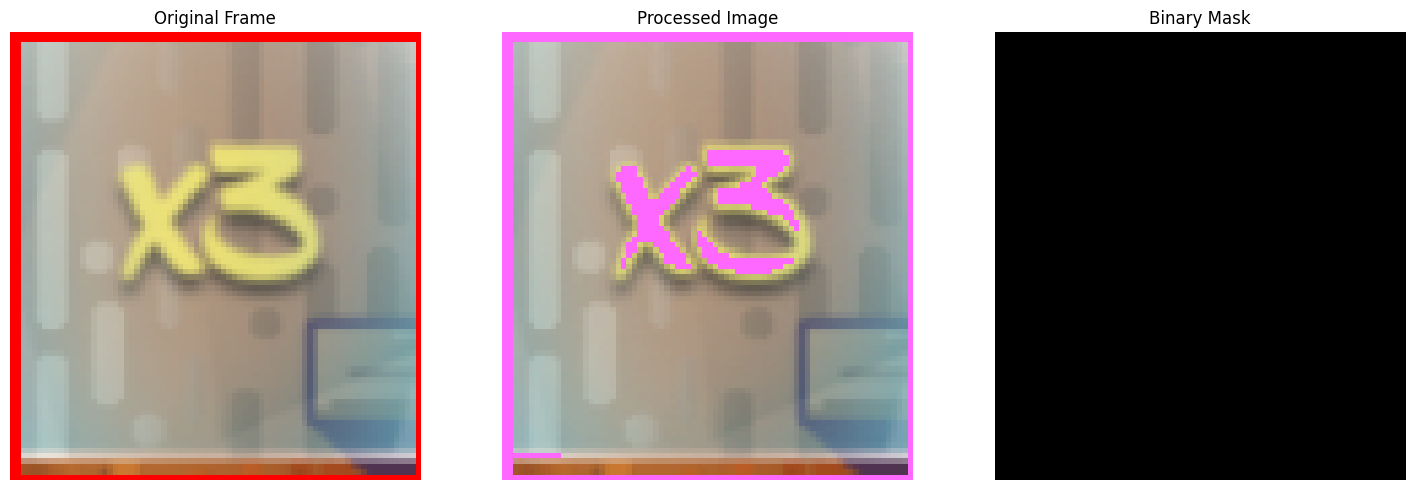

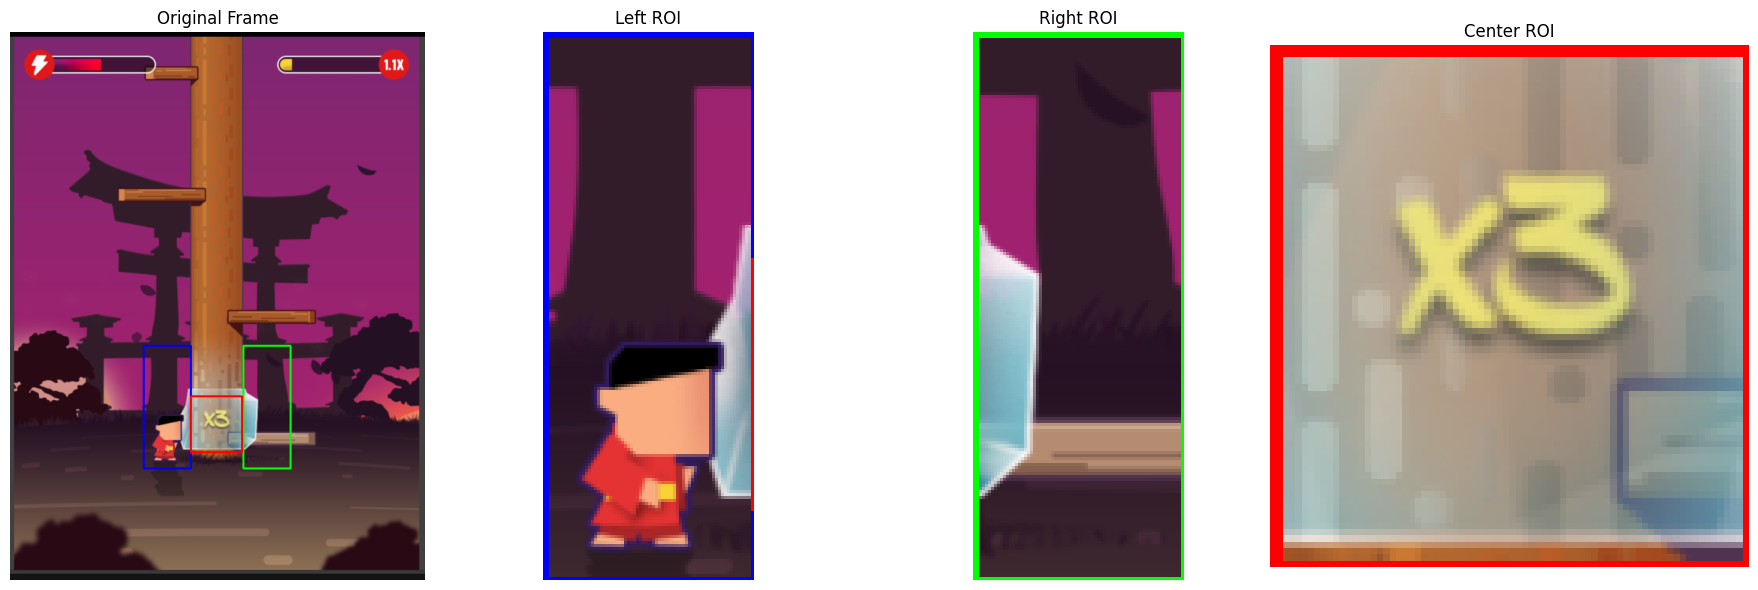

In [251]:
# Load the character template
character_template = cv2.imread("player.png")
if character_template is None:
    print("Error: Could not load character template. Please check the file path.")
    exit()

# Load the frame
frame_left = cv2.imread("saved_regions\game_region_20250104-161556.png")
if frame_left is None:
    print("Error: Could not load frame_left. Please check the file path.")
    exit()

locate_player_and_define_rois(frame_left, character_template)
img = cv2.imread("saved_regions\game_region_20250104-161556.png")
frame = img.copy()
x1 , y1 , w1 , h1 = LEFT_ROI
x2 , y2 , w2 , h2 = RIGHT_ROI
x3 , y3 , w3 , h3 = CENTER_ROI

roi_region_left = img[y1:y1 + h1, x1:x1 + w1]
roi_region_right = img[y2:y2 + h2, x2:x2 + w2]
roi_region_center = img[y3:y3 + h3, x3:x3 + w3]

"""print(detect_branches_in_roi_hough(frame,LEFT_ROI))
print(detect_branches_in_roi_hough(frame,RIGHT_ROI))
print(detect_branches_in_roi_hough(frame,CENTER_ROI))"""

    # Draw left ROI
x, y, w, h = LEFT_ROI
cv2.rectangle(img, (x, y), (x + w, y + h), (255, 0, 0), 2)

    # Draw right ROI
x, y, w, h = RIGHT_ROI
cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)

    # Draw center ROI on the left frame
x, y, w, h = CENTER_ROI
cv2.rectangle(img, (x, y), (x + w, y + h), (0, 0, 255), 2)


# Check if the Center ROI is mostly white
is_branch = isBranchOnly(roi_region_center)
print(f"Is Center ROI Branch Only? {is_branch}")
    # Visualization
fig, ax = plt.subplots(1, 4, figsize=(18, 6))
ax[0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
ax[0].set_title("Original Frame")
ax[0].axis("off")

ax[1].imshow(cv2.cvtColor(roi_region_left, cv2.COLOR_BGR2RGB))
ax[1].set_title("Left ROI")
ax[1].axis("off")

ax[2].imshow(cv2.cvtColor(roi_region_right, cv2.COLOR_BGR2RGB))
ax[2].set_title("Right ROI")
ax[2].axis("off")

ax[3].imshow(cv2.cvtColor(roi_region_center, cv2.COLOR_BGR2RGB))
ax[3].set_title("Center ROI")
ax[3].axis("off")

plt.tight_layout()
plt.show()

In [64]:
in_left = True
def game_loop(frame):
    """
    Main game loop to move the character and detect branches.
    The game always starts with the character on the left.

    Parameters:
        frame (np.ndarray): The input frame where branch detection is performed.
    """
    global LEFT_ROI, RIGHT_ROI, in_left

    if in_left:
        if detect_branches_in_roi_hough(frame, LEFT_ROI):
            move_character("right")
            in_left = False   # Switch to searching in the right ROI
        else:
            move_character("left")  # Keep moving left if no branches in the left ROI
    else:
        if detect_branches_in_roi_hough(frame, RIGHT_ROI):
            move_character("left")
            in_left = True  # Switch to searching in the left ROI
        else:
            move_character("right")  # Keep moving right if no branches in the right ROI

In [65]:
image_paths = [
    "Screenshot 2024-12-16 154156.png" ,
]

In [66]:
player_temp = cv2.imread('player.png')

In [244]:
import cv2
import numpy as np
import mss
import time
import os

# Ensure output directory exists
output_dir = "saved_regions"
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

def capture_screenshot(monitor):
    with mss.mss() as sct:
        screenshot = np.array(sct.grab(monitor))
        return cv2.cvtColor(screenshot, cv2.COLOR_BGRA2BGR)

def on_press(key):
    global game_location
    global located
    try:
        if key.char == 'r':  
            print("[INFO] 'R' key pressed. Searching for the game window...")
            game_location = None  # Reset the game location
            located = False
    except AttributeError:
        pass

def stream_game_region():
    global monitor, running, game_location
    global LEFT_ROI, RIGHT_ROI, CENTER_ROI, in_left
    once = True
    while running:
        # Capture a screenshot
        screenshot = capture_screenshot(monitor)
        
        if game_location is None:
            # Attempt to locate the game window
            game_location = process_and_locate(image_paths, screenshot)
            game_is_running = False
            global located
            located = False
        
        if game_location:
            x, y, w, h = game_location
            
            # Extract and stream the game region
            game_region = screenshot[y:y + h, x:x + w]
            game_region = cv2.resize(game_region, (616, 813))
            
            if not located:
                locate_player_and_define_rois(game_region, player_temp)
                located = True
                
            if all(roi is not None for roi in [LEFT_ROI, RIGHT_ROI, CENTER_ROI]):
                x1, y1, w1, h1 = LEFT_ROI
                x2, y2, w2, h2 = RIGHT_ROI
                x3, y3, w3, h3 = CENTER_ROI
                roi_region_left = game_region[y1:y1 + h1, x1:x1 + w1]
                roi_region_right = game_region[y2:y2 + h2, x2:x2 + w2]
                roi_region_center = game_region[y3:y3 + h3, x3:x3 + w3]
                
                if not game_is_running:
                    game_is_running = True

                cv2.imshow("Game Screen", game_region)
                cv2.imshow("LEFT ROI", roi_region_left)
                cv2.resizeWindow("LEFT ROI", 400, 400)
                cv2.imshow("RIGHT ROI", roi_region_right)
                cv2.resizeWindow("RIGHT ROI", 400, 400)

                #if once:
                    #move_character("left")
                    #in_left = True
                    #once = False
                #game_loop(game_region)

                # Save regions when "S" key is pressed
                if cv2.waitKey(1) & 0xFF == ord('s'):
                    timestamp = time.strftime("%Y%m%d-%H%M%S")
                    cv2.imwrite(os.path.join(output_dir, f"game_region_{timestamp}.png"), game_region)
                    cv2.imwrite(os.path.join(output_dir, f"center_roi_{timestamp}.png"), roi_region_center)
                    cv2.imwrite(os.path.join(output_dir, f"right_roi_{timestamp}.png"), roi_region_right)
                    
                    print("[INFO] Saved game region and ROIs.")
                   
        else:
            # Display black screen with "Game Not Found" text
            black_screen = np.zeros((700, 900, 3), dtype=np.uint8)
            cv2.putText(black_screen, "Game Not Found", (250, 350), cv2.FONT_HERSHEY_SIMPLEX, 1.5, (0, 0, 255), 3)
            cv2.imshow("Game Screen", black_screen)

        # Check for key press to quit
        if cv2.waitKey(1) & 0xFF == ord('q'):
            print("[INFO] 'Q' key pressed. Exiting...")
            running = False
            break

### *main cell*

In [245]:
with mss.mss() as sct:
    monitor = sct.monitors[1]  # Use the primary monitor

# Reference images for matching

# Initialize global variables
game_location = None
running = True

# Start keyboard listener
listener = keyboard.Listener(on_press=on_press)
listener.start()

print("[INFO] Press 'R' to locate the game window.")
print("[INFO] Press 'Q' to quit the script.")

# Start streaming the game region
try:
    stream_game_region()
except KeyboardInterrupt:
    print("[INFO] Script interrupted.")
finally:
    # Cleanup resources
    cv2.destroyAllWindows()
    listener.stop()
    print("[INFO] Script terminated.")

[INFO] Press 'R' to locate the game window.
[INFO] Press 'Q' to quit the script.
[DEBUG] Match results for Game Screen 1: Min Val=1.0 , Max Val=1.0, Min Loc=(0, 0)
[DEBUG] Match results for Game Screen 1: Min Val=1.0 , Max Val=1.0, Min Loc=(0, 0)
[DEBUG] Match results for Game Screen 1: Min Val=1.0 , Max Val=1.0, Min Loc=(0, 0)
[DEBUG] Match results for Game Screen 1: Min Val=1.0 , Max Val=1.0, Min Loc=(0, 0)
[DEBUG] Match results for Game Screen 1: Min Val=1.0 , Max Val=1.0, Min Loc=(0, 0)
[DEBUG] Match results for Game Screen 1: Min Val=1.0 , Max Val=1.0, Min Loc=(0, 0)
[DEBUG] Match results for Game Screen 1: Min Val=1.0 , Max Val=1.0, Min Loc=(0, 0)
[DEBUG] Match results for Game Screen 1: Min Val=1.0 , Max Val=1.0, Min Loc=(0, 0)
[DEBUG] Match results for Game Screen 1: Min Val=1.0 , Max Val=1.0, Min Loc=(0, 0)
[DEBUG] Match results for Game Screen 1: Min Val=1.0 , Max Val=1.0, Min Loc=(0, 0)
[DEBUG] Match results for Game Screen 1: Min Val=1.0 , Max Val=1.0, Min Loc=(0, 0)
[DEBUG

In [240]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def detect_number_in_center_roi_with_debugging(center_roi, ref_images):
    """
    Detects the number in the center ROI using ORB feature matching and visualizes each step.

    Parameters:
    center_roi (numpy.ndarray): The center ROI of the image.
    ref_images (dict): Dictionary of reference images with keys as numbers (e.g., {2, 3, 4}).

    Returns:
    tuple: The detected number and the match percentage.
    """
    # Initialize ORB detector
    orb = cv2.ORB_create()

    # Detect keypoints and descriptors for the center ROI
    kp1, des1 = orb.detectAndCompute(center_roi, None)

    if des1 is None:
        print("No keypoints detected in the center ROI.")
        return None, 0

    best_match = None
    best_score = 0
    all_results = []

    # BFMatcher with Hamming distance
    bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

    # Iterate over reference images
    for number, ref_image_list in ref_images.items():
        for ref_image in ref_image_list: 
        # Detect keypoints and descriptors for the reference image
          kp2, des2 = orb.detectAndCompute(ref_image, None)
  
          if des2 is None:
              print(f"No keypoints detected in the reference image for number {number}.")
              continue
  
          # Match descriptors
          matches = bf.match(des1, des2)
  
          # Sort matches by distance
          matches = sorted(matches, key=lambda x: x.distance)
  
          # Calculate the match percentage
          match_percentage = len(matches) / min(len(kp1), len(kp2)) * 100
          all_results.append((number, match_percentage, matches, ref_image, kp2))
  
          print(f"Number {number} - Match Percentage: {match_percentage:.2f}%")
  
          # Keep track of the best match
          if match_percentage > best_score:
              best_score = match_percentage
              best_match = number

    # Visualization of the best match
    for number, match_percentage, matches, ref_image, kp2 in all_results:
        fig, axes = plt.subplots(1, 3, figsize=(15, 5))
        fig.suptitle(f"Number {number} - Match Percentage: {match_percentage:.2f}%", fontsize=16)

        # Original center ROI
        axes[0].imshow(cv2.cvtColor(center_roi, cv2.COLOR_BGR2RGB))
        axes[0].set_title("Center ROI")
        axes[0].axis("off")

        # Reference image
        axes[1].imshow(cv2.cvtColor(ref_image, cv2.COLOR_BGR2RGB))
        axes[1].set_title(f"Reference Image: {number}")
        axes[1].axis("off")

        # Matches
        match_img = cv2.drawMatches(center_roi, kp1, ref_image, kp2, matches[:20], None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
        axes[2].imshow(cv2.cvtColor(match_img, cv2.COLOR_BGR2RGB))
        axes[2].set_title(f"Top 20 Matches (Number {number})")
        axes[2].axis("off")

        plt.tight_layout()
        plt.show()

    return best_match, best_score

In [247]:
# Load reference images for numbers 2, 3, and 4
ref_images = {
    2: [cv2.imread('reference_images\center_roi_2.png'), cv2.imread('reference_images\center_roi_2_ref_2_short.png'),cv2.imread('reference_images\center_roi_2_ref_2_long.png')],
    3: [cv2.imread('reference_images\center_roi_3.png'), cv2.imread('reference_images\center_roi_3_ref_2_long.png')],
    4: [cv2.imread('reference_images\center_roi_4.png'),  cv2.imread('reference_images\center_roi_4_ref_2_short.png'),cv2.imread('reference_images\center_roi_4_ref_2_long.png')],
}

# Load the center ROI (e.g., extracted from your main image)
center_roi = cv2.imread('center_roi_glass.png')

# Detect the number in the center ROI
detected_number, match_percentage = detect_number_in_center_roi_with_debugging(center_roi, ref_images)

# Output the result
if detected_number:
    print(f"Detected Number: {detected_number} with {match_percentage:.2f}% match.")
else:
    print("No number detected.")


No keypoints detected in the center ROI.
No number detected.


In [ ]:
### possible new game loop ### :
in_left = True

def game_loop(frame):
    """
    Main game loop to move the character and detect branches, numbers, or glass panels.
    The game always starts with the character on the left.

    Parameters:
        frame (np.ndarray): The input frame where branch detection is performed.
    """
    global LEFT_ROI, RIGHT_ROI, CENTER_ROI, in_left

    # Determine the current ROI based on the position
    current_roi = LEFT_ROI if in_left else RIGHT_ROI
    direction = "left" if in_left else "right"

    # Check for branches above the character
    if detect_branches_in_roi_hough(frame, current_roi):
        # If there are branches, move to the opposite side
        move_character("right" if in_left else "left")
        in_left = not in_left
        return

    # Check if the center ROI is branches-only
    if isBranchOnly(CENTER_ROI):
        # If it's branches-only, continue without action
        print("Branches-only detected. Continuing...")
        return

    # Check if the center ROI contains a number
    if isNumber(CENTER_ROI):
        # Get the detected number
        detected_number, match_percentage = getNumber(CENTER_ROI, ref_images)

        if detected_number:
            print(f"Detected number: {detected_number}, Match Percentage: {match_percentage:.2f}%")
            # Hit as many times as the detected number in the safe direction
            move_character(direction, detected_number)
        else:
            print("Number detection failed.")
    else:
        # If it's not branches and not a number, it must be glass
        print("Glass detected.")
        # Hit twice in the safe direction
        move_character(direction, 2)